In [258]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [259]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import  RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold # статистический метод отбора
from sklearn.feature_selection import SelectKBest # статистические методы отбора
from sklearn.feature_selection import f_classif  # в основе ANOVA (односторонний дисперсионный анализ)
from sklearn.feature_selection import SelectFromModel # методы отбора в основе моделей
from sklearn.feature_selection import SequentialFeatureSelector # метод переборов признаков

In [260]:
# 1. СГЕНЕРИРУЙТЕ ДАННЫЕ С ПОМОЩЬЮ КОДА:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1, random_state=1982)

In [261]:
x_data_generated.shape

(100, 20)

In [262]:
len([i for i in y_data_generated if i==1])# сбалансированный целевой признак

48

In [263]:
# 2. ПОСТРОЙТЕ МОДЕЛЬ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ И ОЦЕНИТЕ СРЕДНЮЮ ТОЧНОСТЬ
cross_score_1 = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy')
cross_score_1

array([0.8 , 0.8 , 0.95, 0.95, 0.85])

## 3. Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

### a) Выберите признаки на основе матрицы корреляции.

In [264]:
# a) Выберите признаки на основе матрицы корреляции.
x_df = pd.DataFrame(x_data_generated)
y_target = pd.Series(y_data_generated, name='target')
df = pd.concat([x_df, y_target], axis=1)

Index([1, 3, 7, 10, 18, 'target'], dtype='object')


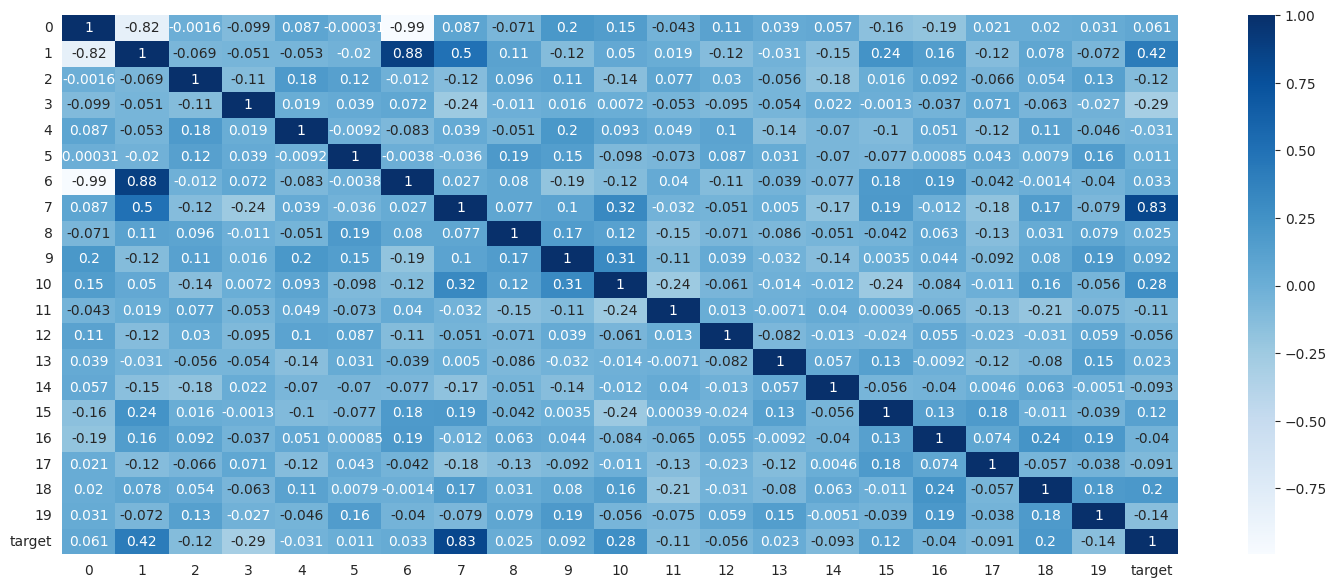

In [265]:
mx = df.corr()
plt.figure(figsize=(18, 7))
sns.heatmap(mx, annot=True, cmap='Blues');
x_corr = mx.loc[(mx['target']>=0.15) | (mx['target']<=-0.15)].index
print(x_corr)
# признаки которые отобрал при корреляции больше 0.15 или меньше -0.15.

### b) Отсеките низковариативные признаки (VarianceThreshold)

In [266]:
# b) Отсеките низковариативные признаки (VarianceThreshold).
variance_list = [] # дисперсия признаков
for col in x_df.columns:
  var = round(np.var(x_df[col]), 4)
  variance_list.append(var)
print(variance_list)

[1.2138, 0.8717, 1.1161, 0.7588, 0.9792, 0.8521, 0.5021, 1.5941, 0.9782, 0.9885, 1.0187, 0.9999, 1.0753, 1.1698, 1.1395, 1.1283, 1.1765, 0.9465, 0.9869, 0.8195]


In [267]:
variance_df = pd.DataFrame(dict(zip(df.columns, variance_list)), index=['variance']) # дисперсия признаков
variance_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
variance,1.2138,0.8717,1.1161,0.7588,0.9792,0.8521,0.5021,1.5941,0.9782,0.9885,1.0187,0.9999,1.0753,1.1698,1.1395,1.1283,1.1765,0.9465,0.9869,0.8195


In [268]:
selector_vartresh = VarianceThreshold(threshold=1) # дисперсия признаков менее 1
x_varthersh = selector_vartresh.fit_transform(x_df)

In [269]:
x_varthersh.shape # отобрано 11 признаков с дисперсией более 1

(100, 9)

In [270]:
l_Variance = len(selector_vartresh.get_feature_names_out())
selector_vartresh.get_feature_names_out() # дисперсия признаков менее 1 исключаются

array(['x0', 'x2', 'x7', 'x10', 'x12', 'x13', 'x14', 'x15', 'x16'],
      dtype=object)

### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [271]:
# До преобразования
print(cross_score_1.mean())
cross_score_1

0.8699999999999999


array([0.8 , 0.8 , 0.95, 0.95, 0.85])

In [272]:
# VarianceThreshold (при отсечении признаков с дисперсией менее 1)
cross_score_varthersh = cross_val_score(LogisticRegression(), x_varthersh, y_data_generated, scoring='accuracy')
print(cross_score_varthersh.mean())
cross_score_varthersh

0.9199999999999999


array([0.85, 0.85, 0.95, 0.95, 1.  ])

In [273]:
# отсечение признаков на основе матрицы корреляции.
cross_score_corr = cross_val_score(LogisticRegression(), x_df[x_corr[:-1]], y_data_generated, scoring='accuracy')
print(cross_score_corr.mean())
cross_score_corr

0.93


array([0.85, 0.85, 1.  , 0.95, 1.  ])

## 4. Осуществите отбор признаков на основе дисперсионного анализа:

In [274]:
# a. Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [275]:
selector_KBest = SelectKBest(f_classif, k=5)
x_KBest = selector_KBest.fit_transform(x_df, y_target)
x_KBest.shape

(100, 5)

In [276]:
selector_KBest.get_feature_names_out()# отобраны лучшие 5 признаков

array(['x1', 'x3', 'x7', 'x10', 'x18'], dtype=object)

In [277]:
# b. Повторите п. 2 на отобранных признаках.
cross_score_f_classif = cross_val_score(LogisticRegression(), x_KBest, y_target, scoring='accuracy')
print(cross_score_f_classif.mean())
cross_score_f_classif

0.93


array([0.85, 0.85, 1.  , 0.95, 1.  ])

## 5. Отбор с использованием моделей:

### a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [278]:
selector_L1 = SelectFromModel(LogisticRegression())
x_L1 = selector_L1.fit_transform(x_df, y_target)
l_selector_L1 = len(selector_L1.get_feature_names_out())
selector_L1.get_feature_names_out() # отобраны лучшие  признаки

array(['x0', 'x1', 'x3', 'x7', 'x11', 'x19'], dtype=object)

In [279]:
cross_score_l1 = cross_val_score(LogisticRegression(), x_L1, y_target, scoring='accuracy')
print(cross_score_l1.mean())
cross_score_l1

0.9400000000000001


array([0.85, 0.85, 1.  , 1.  , 1.  ])

In [280]:
model_lasso = Lasso(alpha=0.025)
model_lasso.fit(x_df, y_target)
sorted(zip(model_lasso.coef_, x_df), reverse=True)

[(0.30353466208359786, 7),
 (0.009048570755782864, 18),
 (0.0, 17),
 (-0.0, 16),
 (-0.0, 15),
 (0.0, 14),
 (0.0, 13),
 (-0.0, 12),
 (0.0, 10),
 (0.0, 9),
 (-0.0, 8),
 (0.0, 6),
 (0.0, 5),
 (-0.0, 2),
 (0.0, 1),
 (-0.0, 0),
 (-0.005684328368499822, 4),
 (-0.016191738854521506, 11),
 (-0.01950397469748945, 19),
 (-0.031763621538576856, 3)]

### b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [281]:
model_ranforest_class = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=42)
model_ranforest_class.fit(x_df, y_target)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

In [282]:
df_feature_importances = pd.DataFrame({'feature': x_df.columns, 'weight': model_ranforest_class.feature_importances_.round(3)}).sort_values(by='weight', ascending=False)
df_feature_importances.head(10) # первые 10 по важности признаки

,feature,weight
7,7,0.484
1,1,0.113
18,18,0.047
19,19,0.041
10,10,0.035
3,3,0.033
6,6,0.027
2,2,0.026
0,0,0.024
11,11,0.023


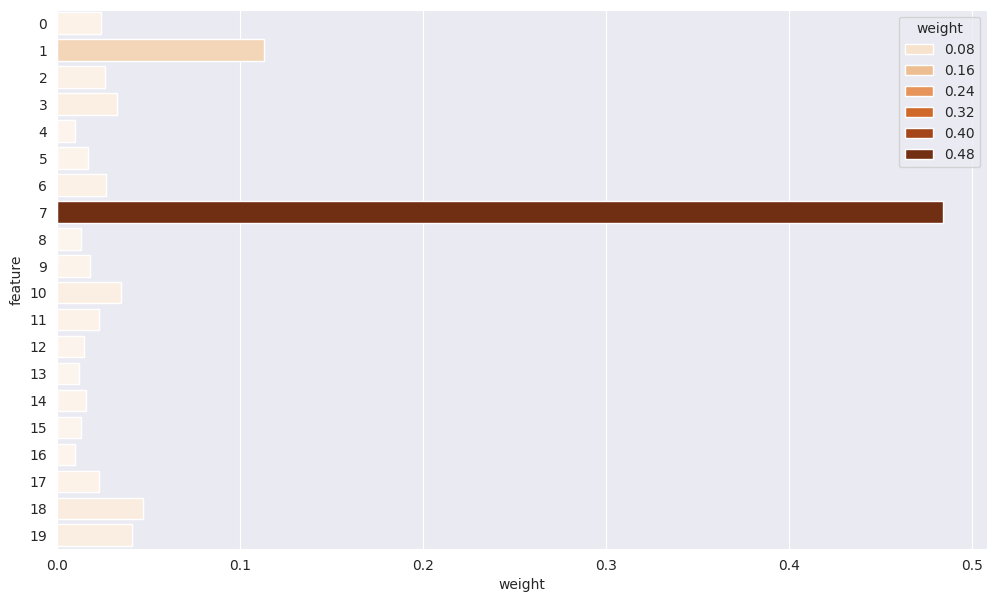

In [283]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 7))
sns.barplot(data=df_feature_importances, x='weight', y='feature', hue='weight', palette='Oranges', orient='h');

### c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [284]:
cross_score_forest = cross_val_score(model_ranforest_class, x_df, y_target, scoring='accuracy')
print(cross_score_forest.mean())
cross_score_forest

0.96


array([0.9 , 0.95, 0.95, 1.  , 1.  ])

## 6. Перебор признаков:

In [285]:
selector_SFS = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=3)
selector_SFS.fit(x_df, y_target)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=3)

In [286]:
l_SFS = len(selector_SFS.get_feature_names_out())
selector_SFS.get_feature_names_out() # лучшие 3 признака

array(['x0', 'x1', 'x7'], dtype=object)

In [287]:
x_SFS = selector_SFS.fit_transform(x_df, y_target)

In [288]:
cross_score_SFS = cross_val_score(LogisticRegression(), x_SFS, y_target, scoring='accuracy')
print(cross_score_SFS.mean())
cross_score_SFS

0.96


array([0.9 , 0.95, 0.95, 1.  , 1.  ])

In [295]:
# RFE, RFECV
from sklearn.feature_selection import RFE, RFECV
selector_rfecv = RFECV(LogisticRegression(), min_features_to_select=1)
selector_rfecv.fit(x_df, y_target)
l_rfecv = len(selector_rfecv.get_feature_names_out())
print(selector_rfecv.get_feature_names_out()) # лучшие признаки
x_rfecv = selector_rfecv.fit_transform(x_df, y_target)

cross_score_rfecv = cross_val_score(LogisticRegression(), x_rfecv, y_target, scoring='accuracy')
print(cross_score_rfecv.mean())
cross_score_rfecv

['x7']
0.96


array([0.9 , 0.95, 0.95, 1.  , 1.  ])

## 7. Сформулируйте выводы по проделанной работе:

In [296]:
df_result = pd.DataFrame({'способ выбора признаков': ['before', 'VarianceThreshold', 'correlation', 'f_classif', 'L1 регуляризация', 'RandomForestClass', 'SequentialFeatureSelector', 'RFECV'],
                          'количество признаков': [len(x_df.columns), l_Variance, len(x_corr[:-1]), selector_KBest.get_params()['k'], l_selector_L1, len(x_df.columns), l_SFS, l_rfecv],
                          'средняя точность модели': [cross_score_1.mean(), cross_score_varthersh.mean(), cross_score_corr.mean(),
                                                      cross_score_f_classif.mean(), cross_score_l1.mean(), cross_score_forest.mean(), cross_score_SFS.mean(), cross_score_rfecv.mean()]})

In [297]:
df_result

,способ выбора признаков,количество признаков,средняя точность модели
0,before,20,0.87
1,VarianceThreshold,9,0.92
2,correlation,5,0.93
3,f_classif,5,0.93
4,L1 регуляризация,6,0.94
5,RandomForestClass,20,0.96
6,SequentialFeatureSelector,3,0.96
7,RFECV,1,0.96


In [ ]:
# 1. Используя разный random_state при генерации признаков методы отрабатывали по-разному. Поэтому выбор того или иного метода отбора и преобразования признаков зависит от исходных данных
# 2. Как правило лучкше всех отрабатывали методы перебора признаков (SequentialFeatureSelector, RFECV) - при random_state=1982 самым популярным признаком является 7 (случайный лес, RFECV.....)
 # даже с одним признаком RFECV получился один из лучших результатов.(при увеличении призанков  методе RFECV показатель accuracy ухудшался)
